In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# x = np.load("fvs.npy")
x = np.load("fvs-15-1.npy")

In [6]:
x

array([[ 4.12689877e+00,  5.96740532e+00,  5.86654854e+00, ...,
         3.92578125e-01,  0.00000000e+00, -9.99999975e-05],
       [ 4.12782431e+00,  5.96737766e+00,  5.86671686e+00, ...,
         3.88183594e-01,  0.00000000e+00, -9.99999975e-05],
       [ 4.12867975e+00,  5.96754932e+00,  5.86735153e+00, ...,
         3.82324219e-01,  0.00000000e+00, -9.99999975e-05],
       ...,
       [ 4.01934862e+00,  5.35320044e+00,  5.14744949e+00, ...,
        -1.64062500e-01,  0.00000000e+00,  2.66999993e-02],
       [ 4.01933765e+00,  5.35786009e+00,  5.15724230e+00, ...,
        -1.64062500e-01,  0.00000000e+00,  3.29999998e-02],
       [ 4.01925802e+00,  5.36252022e+00,  5.16667604e+00, ...,
        -1.64062500e-01,  0.00000000e+00,  4.30999994e-02]])

In [7]:
x.shape

(2313, 15)

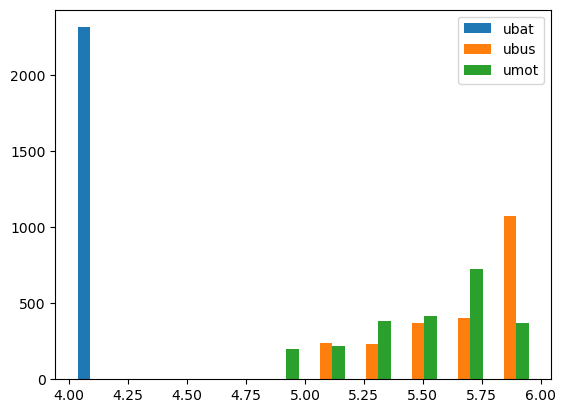

In [18]:
plt.hist(x[:,:3], bins=10, label=['ubat', 'ubus', 'umot'])
# plt.yscale("log")
plt.legend()

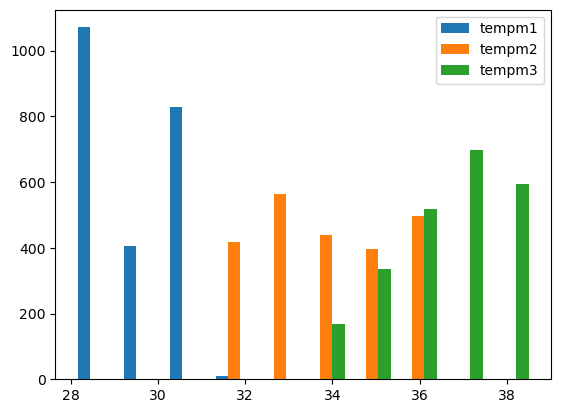

In [19]:
plt.hist(x[:,[3,7,11,]], bins=10, label=['tempm1', 'tempm2', 'tempm3'])
# plt.yscale("log")
plt.legend()

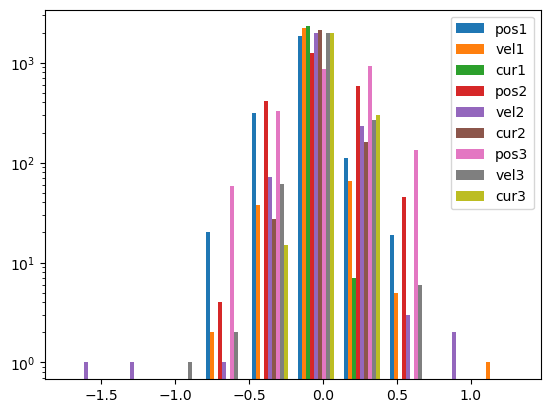

In [21]:
plt.hist(x[:,[4,5,6,8,9,10,12,13,14]], bins=10, label=['pos1', 'vel1', 'cur1', 'pos2', 'vel2', 'cur2', 'pos3', 'vel3', 'cur3'])
plt.yscale("log")
plt.legend()

In [22]:
x.min(axis=0)

array([ 4.0165453 ,  5.02468586,  4.9271512 , 28.04999924, -0.65625   ,
       -0.73242188, -0.14459999, 31.34999847, -0.64160156, -1.7578125 ,
       -0.34109998, 33.65999985, -0.609375  , -0.95214844, -0.24759999])

In [23]:
x.max(axis=0)

array([ 4.19281864,  5.96887875,  5.87092161, 31.84000015,  0.6328125 ,
        1.35498047,  0.17129999, 36.45999908,  0.61962891,  0.80566406,
        0.40649998, 38.61000061,  0.62841797,  0.54931641,  0.36129999])

In [30]:
for _ in x.mean(axis=0):
    print(f"{_:>.2f},")

4.07,
5.64,
5.48,
29.55,
-0.06,
0.00,
0.00,
33.83,
0.00,
-0.00,
0.01,
36.49,
0.07,
-0.00,
0.01,


In [32]:
for _ in x.std(axis=0):
    print(f"{_:>.2f},")

0.06,
0.29,
0.28,
1.00,
0.13,
0.07,
0.02,
1.47,
0.21,
0.11,
0.08,
1.18,
0.26,
0.10,
0.08,


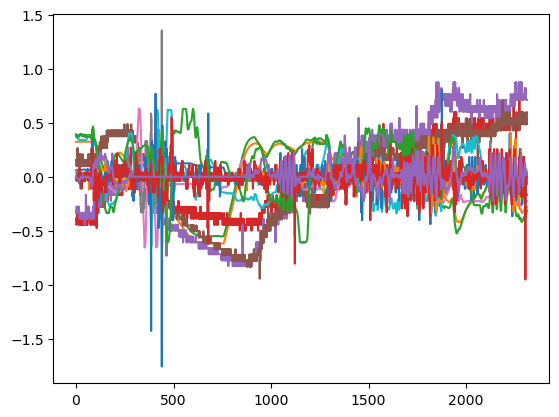

In [39]:
u_all = x[:,:3]
tmp_all = x[:,[3,7,11,]]
mot_all = x[:,[4,5,6,8,9,10,12,13,14]]
plt.plot((u_all - np.mean(u_all, axis=0)), label="U")
plt.plot((tmp_all - np.mean(tmp_all, axis=0))/3, label="temp")
plt.plot(mot_all, label="mot")

In [40]:
np.save("fvs-15-2.npy", x)

In [41]:
xx = np.load('fvs-15-2.npy')

In [43]:
xx.shape

(2313, 15)

### interpolate random functions
- create random datapoints
- interpolate
- normalize

In [44]:
from scipy.interpolate import interp1d

In [45]:
interp1d?

In [94]:
from functools import partial

In [95]:
partial?

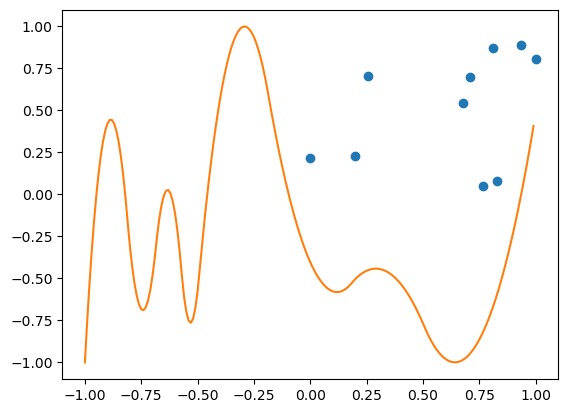

In [132]:
# x = np.arange(0, 10)
# y = np.exp(-x/3.0)
def make_random_transfer_func():
    x = np.concatenate(([-1], np.random.uniform(-1, 1, 8), [1]))
    y = np.random.uniform(0, 1, 10)
    f = interp1d(x, y, kind="quadratic")

    # xnew = np.arange(0, 9, 0.1)
    xnew = np.arange(-1, 1, 0.01)
    ynew = f(xnew)   # use interpolation function returned by `interp1d`
    # ynew = ynew - np.min(ynew)
    ymin = np.min(ynew)
    ymax = np.max(ynew - ymin)
    # ynew = np.tanh(f(xnew))   # use interpolation function returned by `interp1d`
    def g(ymin, ymax, f, x):
        return ((f(x) - ymin) / ymax) * 2 - 1

    h = partial(g, ymin, ymax, f)
    return h

# ynew = g(ymin, ymax, f, xnew)
h = make_random_transfer_func()
xnew = np.arange(-1, 1, 0.01)
ynew = h(xnew)
plt.plot(x, y, 'o', xnew, ynew, '-')


In [111]:
interp1d?